In [22]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



%matplotlib inline

In [23]:
conda install -c conda-forge umap-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.1
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [24]:
final_df = pd.read_csv("../data/processed/final_df.csv")

In [25]:
final_df.head()

,id_student,age_band,gender,highest_education,n_assignments,mean_score,final_result,total_clicks,studied_credits,region,code_module,code_presentation,press_mod
0,11391,55<=,M,HE Qualification,5,82.0,Pass,934,240,East Anglian Region,AAA,2013J,2013J-AAA
1,28400,35-55,F,HE Qualification,5,66.4,Pass,1435,60,Scotland,AAA,2013J,2013J-AAA
2,31604,35-55,F,A Level or Equivalent,5,76.0,Pass,2158,60,South East Region,AAA,2013J,2013J-AAA
3,32885,0-35,F,Lower Than A Level,5,54.4,Pass,1034,60,West Midlands Region,AAA,2013J,2013J-AAA
4,38053,35-55,M,A Level or Equivalent,5,68.0,Pass,2445,60,Wales,AAA,2013J,2013J-AAA


In [26]:
final_df.dtypes

id_student             int64
age_band              object
gender                object
highest_education     object
n_assignments          int64
mean_score           float64
final_result          object
total_clicks           int64
studied_credits        int64
region                object
code_module           object
code_presentation     object
press_mod             object
dtype: object

In [27]:
final_df.mean_score.min()

0.0

Separating numerical and categorical columns

In [28]:
num_df = pd.DataFrame(data=final_df, columns=["n_assignments", "mean_score", "total_clicks", "studied_credits",])

cat_df = pd.DataFrame(data=final_df, columns=["id_student", "age_band", "gender", "highest_education", "final_result", "region"])


In [29]:
num_df.isnull().sum()

n_assignments       0
mean_score         19
total_clicks        0
studied_credits     0
dtype: int64

In [30]:
num_df.dtypes

n_assignments        int64
mean_score         float64
total_clicks         int64
studied_credits      int64
dtype: object

In [31]:
num_df.describe()

,n_assignments,mean_score,total_clicks,studied_credits
count,26721.000000,26702.000000,26721.000000,26721.000000
mean,7.747315,72.837888,1792.429812,77.769357
std,4.542077,15.560017,2094.342100,39.026739
min,0.000000,0.000000,1.000000,30.000000
25%,4.000000,64.800000,460.000000,60.000000
50%,7.000000,75.727273,1082.000000,60.000000
75%,11.000000,84.080357,2383.000000,90.000000
max,28.000000,100.000000,28615.000000,630.000000


In [32]:
#find null values
num_df[num_df.isnull().any(axis=1)]

,n_assignments,mean_score,total_clicks,studied_credits
797,0,NaN,30,120
1734,0,NaN,75,60
1843,0,NaN,21,60
4498,0,NaN,9,120
6171,0,NaN,31,60
13730,0,NaN,155,60
13768,0,NaN,576,60
13769,0,NaN,576,60
14355,0,NaN,317,120
17039,0,NaN,62,60


In [33]:
#replace nan with mean value
num_df["mean_score"].fillna(72.83, inplace = True)

In [34]:
num_df.describe()

,n_assignments,mean_score,total_clicks,studied_credits
count,26721.000000,26721.000000,26721.000000,26721.000000
mean,7.747315,72.837882,1792.429812,77.769357
std,4.542077,15.554484,2094.342100,39.026739
min,0.000000,0.000000,1.000000,30.000000
25%,4.000000,64.800000,460.000000,60.000000
50%,7.000000,75.714286,1082.000000,60.000000
75%,11.000000,84.047619,2383.000000,90.000000
max,28.000000,100.000000,28615.000000,630.000000


In [35]:
#replace "0s" with mean
num_df['n_assignments'] = np.where((num_df.n_assignments == 0), 7, num_df.n_assignments)


In [36]:
num_df['mean_score'] = np.where((num_df.mean_score == 0.0), 72.83, num_df.mean_score)

In [37]:
num_df.dtypes

n_assignments        int64
mean_score         float64
total_clicks         int64
studied_credits      int64
dtype: object

In [38]:
num_df

,n_assignments,mean_score,total_clicks,studied_credits
0,5,82.000000,934,240
1,5,66.400000,1435,60
2,5,76.000000,2158,60
3,5,54.400000,1034,60
4,5,68.000000,2445,60
...,...,...,...,...
26716,9,88.888889,476,30
26717,9,88.111111,893,30
26718,9,76.666667,312,30
26719,2,91.500000,275,30


Scaling numerical DF

In [39]:
num_df_log = np.log(num_df)

In [40]:
#to numpy

In [41]:
np_num_log = num_df_log.to_numpy()

In [42]:
reducer = umap.UMAP(random_state=42)
reducer.fit(np_num_log.data)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [44]:
embedding = reducer.transform(np_num_log.data)


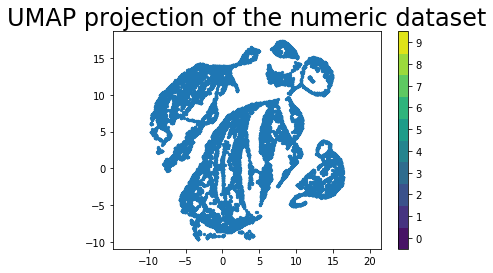

In [45]:
plt.scatter(embedding[:, 0], embedding[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the numeric dataset', fontsize=24);